In [187]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

## 生成表格
- 生成一个表格形式的结果

In [188]:
import pandas as pd
import numpy as np
import scipy.io as sio
from utils import frokf_sta, frols_sta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("muted")
sns.set_style("whitegrid")

In [189]:
cols = ['noise_var', 'term', 'true_coef', 'FROLS_mean', 'FROLS_var', 'FROLS_mae', 'FROKF_mean', 'FROKF_var', 'FROKF_mae']
linear_ret5 = pd.DataFrame(columns=cols)
nonlinear_ret5 = pd.DataFrame(columns=cols)
linear_ret10 = pd.DataFrame(columns=cols)
nonlinear_ret10 = pd.DataFrame(columns=cols)

- 候选项

In [190]:
con_terms_linear5 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)', 'x1(t-3)', 'x1(t-2)', 'x4(t-1)', 'x5(t-1)', 'x4(t-1)', 'x5(t-1)']  # 9
con_terms_nonlinear5 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)*x1(t-2)', 'x1(t-3)', 'x1(t-2)*x1(t-2)', 'x4(t-1)', 'x5(t-1)', 'x4(t-1)', 'x5(t-1)']  # 9
true_coefs5 = [0.95*np.sqrt(2), -0.9025, 0.5, -0.4, -0.5, 0.25*np.sqrt(2), 0.25*np.sqrt(2), -0.25*np.sqrt(2), 0.25*np.sqrt(2)]  # 9
con_terms_linear10 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)', 'x2(t-3)', 'x1(t-2)', 'x4(t-4)', 'x9(t-2)', 'x4(t-4)', 'x1(t-1)', 'x1(t-2)', 'x7(t-2)', 
                      'x8(t-3)', 'x9(t-3)', 'x8(t-3)', 'x9(t-3)', 'x7(t-4)']  # 16
con_terms_nonlinear10 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)*x1(t-2)', 'x2(t-3)', 'x1(t-2)', 'x4(t-4)', 'x9(t-2)', 'x4(t-4)', 'x1(t-1)*x1(t-2)', 'x1(t-2)', 'x7(t-2)', 
                      'x8(t-3)', 'x9(t-3)', 'x8(t-3)', 'x9(t-3)', 'x7(t-4)']  # 16
true_coefs10 = [0.95*np.sqrt(2), -0.9025, 0.5, 0.9, -0.5, 0.8, -0.4, -0.8, 0.4, -0.4, -0.9, 0.4, 0.3, -0.3, 0.4, -0.75]  # 16
noises = np.linspace(0.5, 4, 8)
con_terms5 = [2, 1, 1, 3, 2]
con_terms10 = [2, 1, 1, 1, 2, 1, 2, 3, 2, 1]
root = '../data/'

### 5 通道

- 行数 8 种噪音 * 9 候选项 = 72

In [191]:
linear_ret5['noise_var'] = np.hstack([[noises[i]] * 9 for i in range(8)])
linear_ret5['term'] = np.hstack(con_terms_linear5 * 8)
linear_ret5['true_coef'] = np.hstack(true_coefs5 * 8)
nonlinear_ret5['noise_var'] = np.hstack([[noises[i]] * 9 for i in range(8)])
nonlinear_ret5['term'] = np.hstack(con_terms_nonlinear5 * 8)
nonlinear_ret5['true_coef'] = np.hstack(true_coefs5 * 8)

In [192]:
linear_ret5.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
60,3.5,x5(t-1),0.353553,NaN,NaN,NaN,NaN,NaN,NaN
22,1.5,x1(t-2),-0.500000,NaN,NaN,NaN,NaN,NaN,NaN
34,2.0,x4(t-1),-0.353553,NaN,NaN,NaN,NaN,NaN,NaN
69,4.0,x5(t-1),0.353553,NaN,NaN,NaN,NaN,NaN,NaN
42,2.5,x5(t-1),0.353553,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
nonlinear_ret5.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
11,1.0,x1(t-2)*x1(t-2),0.500000,NaN,NaN,NaN,NaN,NaN,NaN
46,3.0,x1(t-2),-0.902500,NaN,NaN,NaN,NaN,NaN,NaN
64,4.0,x1(t-2),-0.902500,NaN,NaN,NaN,NaN,NaN,NaN
32,2.0,x4(t-1),0.353553,NaN,NaN,NaN,NaN,NaN,NaN
53,3.0,x5(t-1),0.353553,NaN,NaN,NaN,NaN,NaN,NaN


### 10 通道
- 行数 8 种噪音 * 16 候选项 = 128

In [194]:
linear_ret10['noise_var'] = np.hstack([[noises[i]] * 16 for i in range(8)])
linear_ret10['term'] = np.hstack(con_terms_linear10 * 8)
linear_ret10['true_coef'] = np.hstack(true_coefs10 * 8)
nonlinear_ret10['noise_var'] = np.hstack([[noises[i]] * 16 for i in range(8)])
nonlinear_ret10['term'] = np.hstack(con_terms_nonlinear10 * 8)
nonlinear_ret10['true_coef'] = np.hstack(true_coefs10 * 8)

In [195]:
linear_ret10.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
24,1.0,x1(t-1),0.4,NaN,NaN,NaN,NaN,NaN,NaN
117,4.0,x4(t-4),0.8,NaN,NaN,NaN,NaN,NaN,NaN
34,1.5,x1(t-2),0.5,NaN,NaN,NaN,NaN,NaN,NaN
45,1.5,x8(t-3),-0.3,NaN,NaN,NaN,NaN,NaN,NaN
74,2.5,x7(t-2),-0.9,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
nonlinear_ret10.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
0,0.5,x1(t-1),1.343503,NaN,NaN,NaN,NaN,NaN,NaN
63,2.0,x7(t-4),-0.750000,NaN,NaN,NaN,NaN,NaN,NaN
57,2.0,x1(t-2),-0.400000,NaN,NaN,NaN,NaN,NaN,NaN
122,4.0,x7(t-2),-0.900000,NaN,NaN,NaN,NaN,NaN,NaN
56,2.0,x1(t-1)*x1(t-2),0.400000,NaN,NaN,NaN,NaN,NaN,NaN


- 获取各个算法的估计系数与统计信息

In [197]:
for func in ['FROLS', 'FROKF']:
    for dtype in ['linear', 'nonlinear']:
        for dim in [5, 10]:
            info_m, info_v = [], []
            for noise_var in noises:
                m, v = eval(f'{func.lower()}_sta')(dtype, dim, noise_var)
                info_m.extend(list(m))
                info_v.extend(list(v))
            eval(f'{dtype}_ret{dim}')[f'{func}_mean'] = info_m
            eval(f'{dtype}_ret{dim}')[f'{func}_var'] = info_v
            eval(f'{dtype}_ret{dim}')[f'{func}_mae'] = np.abs(eval(f'{dtype}_ret{dim}')[f'{func}_mean'].values - eval(f'{dtype}_ret{dim}')['true_coef'].values)

In [198]:
linear_ret5.tail(18)
linear_ret5.shape

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
54,3.5,x1(t-1),1.343503,1.367388,0.0,0.023885,1.332970,0.0,0.010533
55,3.5,x1(t-2),-0.902500,-0.935038,0.0,0.032538,-0.957457,0.0,0.054957
56,3.5,x1(t-2),0.500000,0.498674,0.0,0.001326,0.510923,0.0,0.010923
57,3.5,x1(t-3),-0.400000,-0.384923,0.0,0.015077,-0.382170,0.0,0.017830
58,3.5,x1(t-2),-0.500000,-0.495899,0.0,0.004101,-0.504648,0.0,0.004648
59,3.5,x4(t-1),0.353553,0.327440,0.0,0.026113,0.368639,0.0,0.015086
60,3.5,x5(t-1),0.353553,0.353911,0.0,0.000357,0.396178,0.0,0.042624
61,3.5,x4(t-1),-0.353553,-0.350270,0.0,0.003283,-0.306316,0.0,0.047237
62,3.5,x5(t-1),0.353553,0.366205,0.0,0.012652,0.241162,0.0,0.112391
63,4.0,x1(t-1),1.343503,1.309189,0.0,0.034314,1.305607,0.0,0.037896


(72, 9)

In [199]:
nonlinear_ret5.head(18)
nonlinear_ret5.shape

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
0,0.5,x1(t-1),1.343503,1.377806,0.0,0.034303,1.399498,0.0,0.055995
1,0.5,x1(t-2),-0.902500,-0.931284,0.0,0.028784,-0.906576,0.0,0.004076
2,0.5,x1(t-2)*x1(t-2),0.500000,0.497331,0.0,0.002669,0.522431,0.0,0.022431
3,0.5,x1(t-3),-0.400000,-0.413498,0.0,0.013498,-0.447062,0.0,0.047062
4,0.5,x1(t-2)*x1(t-2),-0.500000,-0.498288,0.0,0.001712,-0.492014,0.0,0.007986
5,0.5,x4(t-1),0.353553,0.350418,0.0,0.003135,0.228643,0.0,0.124910
6,0.5,x5(t-1),0.353553,0.350609,0.0,0.002945,0.249113,0.0,0.104441
7,0.5,x4(t-1),-0.353553,-0.355684,0.0,0.002131,-0.386631,0.0,0.033077
8,0.5,x5(t-1),0.353553,0.334360,0.0,0.019194,0.300634,0.0,0.052920
9,1.0,x1(t-1),1.343503,1.322933,0.0,0.020570,1.212698,0.0,0.130805


(72, 9)

### 保存

In [200]:
linear_ret5.to_csv('../results/linear_ret5.csv', index=False, encoding='utf-8')
nonlinear_ret5.to_csv('../results/nonlinear_ret5.csv', index=False, encoding='utf-8')
linear_ret10.to_csv('../results/linear_ret10.csv', index=False, encoding='utf-8')
nonlinear_ret10.to_csv('../results/nonlinear_ret10.csv', index=False, encoding='utf-8')

### 结果可视化

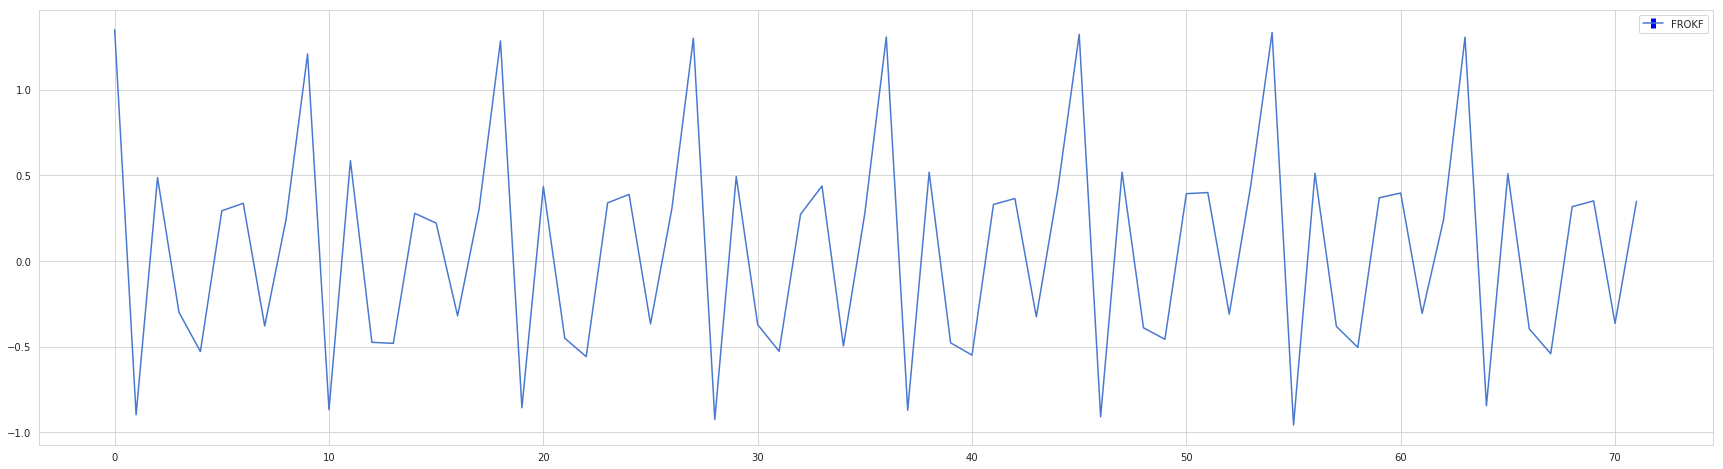

In [201]:
fig = plt.figure(figsize=(30, 8))
x = np.arange(linear_ret5.shape[0])
_ = plt.errorbar(x, linear_ret5['FROKF_mean'], yerr=linear_ret5['FROKF_var']*100, ecolor='b', elinewidth=5, label='FROKF')
_ = plt.legend(loc='upper right')

In [202]:
def vis_err(dtype, dim, root='../results/'):
    fig = plt.figure(figsize=(30, 8))
    data = eval(f'{dtype}_ret{dim}')
    x = np.arange(data.shape[0])
    _ = plt.errorbar(x, data['FROLS_mean'], yerr=data['FROLS_var']*100, fmt='o--', elinewidth=3, label='FROLS')
    _ = plt.errorbar(x, data['FROKF_mean'], yerr=data['FROKF_var']*100, fmt='o--', elinewidth=3, label='FROKF')
    _ = plt.legend(loc='upper right')
    plt.savefig(f'{root}{dtype}_{dim}D_errbar.png')

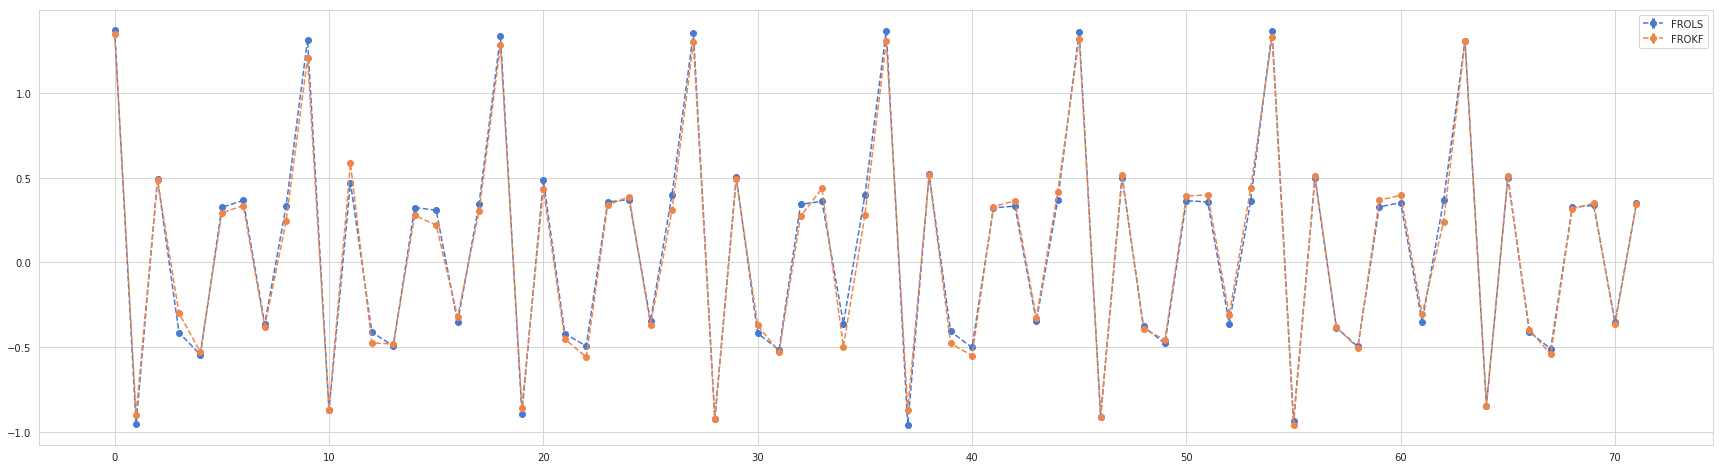

In [203]:
vis_err('linear', 5)

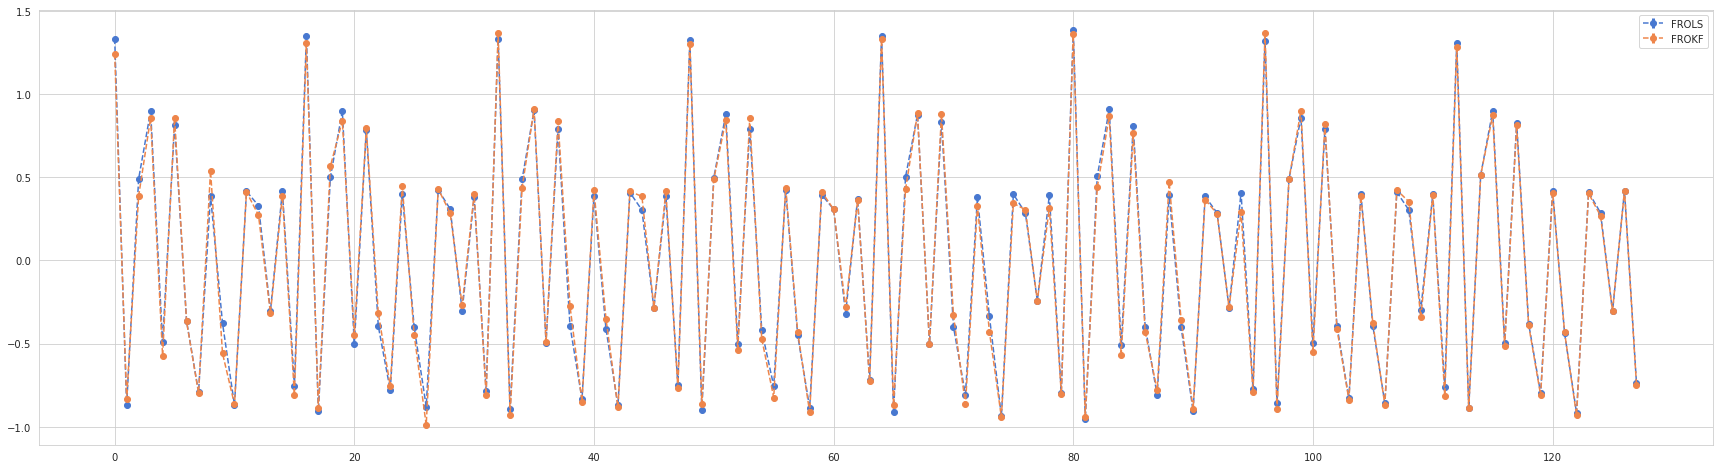

In [204]:
vis_err('linear', 10)

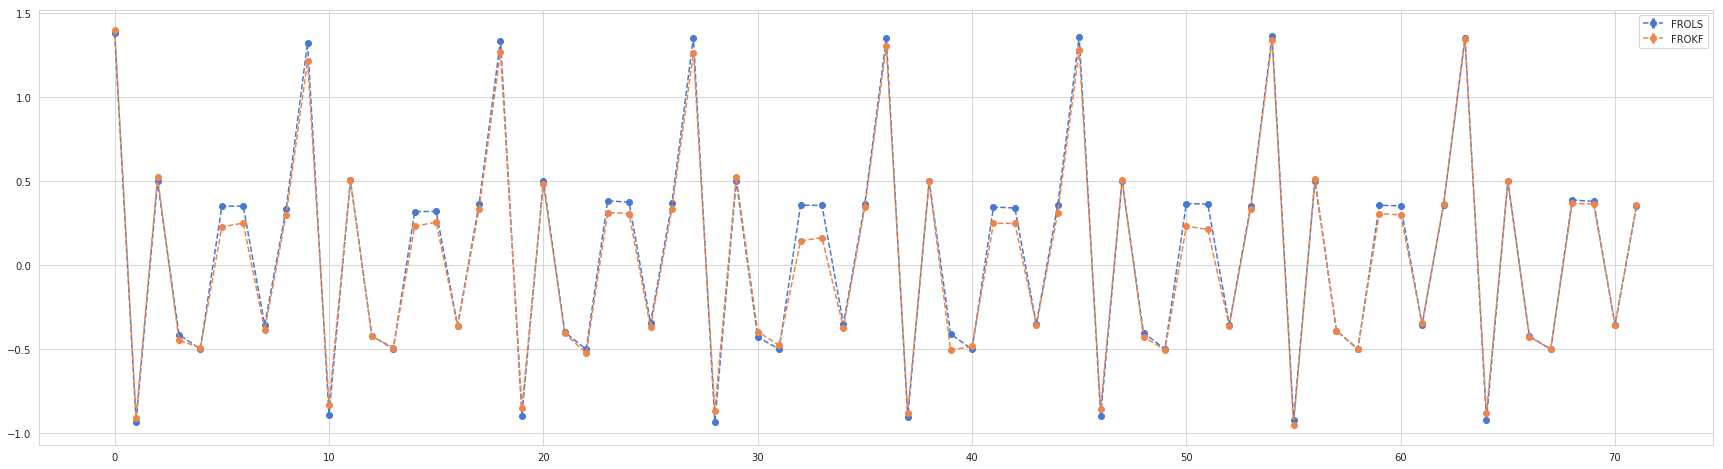

In [205]:
vis_err('nonlinear', 5)

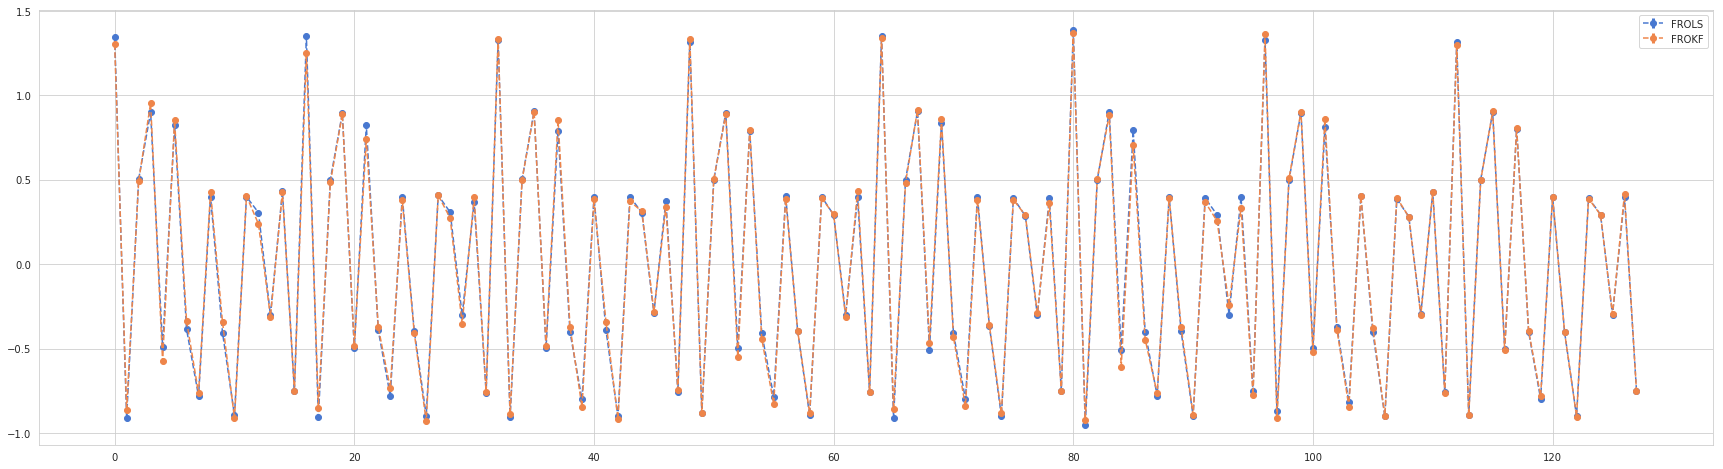

In [206]:
vis_err('nonlinear', 10)

In [207]:
nonlinear_ret10.tail(18)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
110,3.5,x9(t-3),0.400000,0.424436,0.0,0.024436,0.428203,0.0,0.028203
111,3.5,x7(t-4),-0.750000,-0.756401,0.0,0.006401,-0.762021,0.0,0.012021
112,4.0,x1(t-1),1.343503,1.313174,0.0,0.030329,1.295879,0.0,0.047624
113,4.0,x1(t-2),-0.902500,-0.891323,0.0,0.011177,-0.896802,0.0,0.005698
114,4.0,x1(t-2)*x1(t-2),0.500000,0.500884,0.0,0.000884,0.496554,0.0,0.003446
115,4.0,x2(t-3),0.900000,0.899458,0.0,0.000542,0.904211,0.0,0.004211
116,4.0,x1(t-2),-0.500000,-0.501112,0.0,0.001112,-0.508529,0.0,0.008529
117,4.0,x4(t-4),0.800000,0.802179,0.0,0.002179,0.804795,0.0,0.004795
118,4.0,x9(t-2),-0.400000,-0.402006,0.0,0.002006,-0.395467,0.0,0.004533
119,4.0,x4(t-4),-0.800000,-0.798671,0.0,0.001329,-0.780568,0.0,0.019432


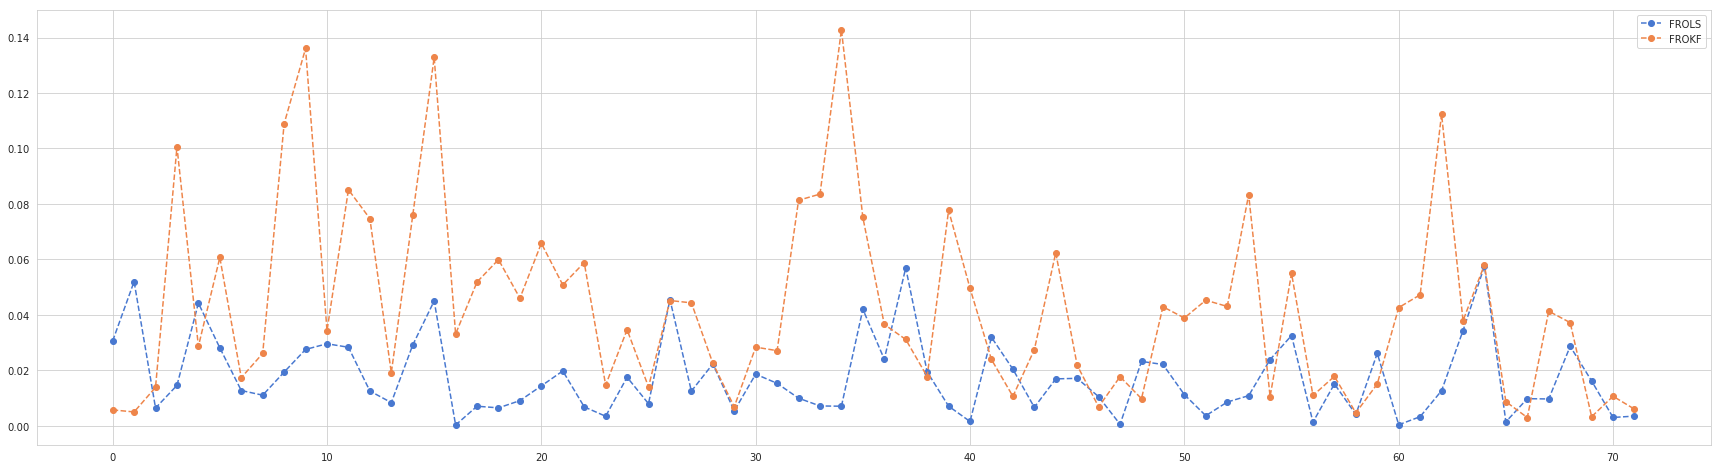

In [208]:
fig = plt.figure(figsize=(30, 8))
data = linear_ret5
x = np.arange(data.shape[0])
_ = plt.plot(x, data['FROLS_mae'], 'o--', label='FROLS')
_ = plt.plot(x, data['FROKF_mae'], 'o--', label='FROKF')
_ = plt.legend(loc='upper right')